#Importing libraries and reading data

In [18]:
import sklearn
print(sklearn.__version__)

1.3.2


In [19]:
#Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances, euclidean_distances
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [20]:
#Reading the data into the dataframe 'df' and viewing the first 10 rows
df = pd.read_csv("apartments.csv")
df.head(10)
df.shape

(1716, 5)

#Preprocessing

In [21]:
#Checking for null values
df.isna().sum()

Agency       0
location     0
bedrooms     0
bathrooms    0
price        0
dtype: int64

In [22]:
df.duplicated().sum()

79

In [47]:
df = df.drop_duplicates()
df.shape

(1637, 5)

In [24]:
# Identifying the unique values in the location column
df['location'].unique()

array(['General Mathenge, Westlands', 'Kilimani, Dagoretti North',
       'Hatheru Rd,, Lavington, Dagoretti North', 'Imara Daima, Embakasi',
       'Waiyaki Way, Westlands',
       'Off Denis Pritt, Kilimani, Dagoretti North',
       'Westlands Area, Westlands', 'Thika Road, Thika Road',
       'Raphta rd, Rhapta Road, Westlands', 'Thindigua, Thindigua',
       'Kileleshwa, Dagoretti North', 'Riverside, Westlands',
       'Riverside Drive, Riverside, Westlands', 'Parklands, Westlands',
       'Riara, Lavington, Dagoretti North',
       'Sports Road, Waiyaki Way, Westlands', 'MUIRU, Ruaka, Kiambaa',
       'Ruaka, Kiambaa',
       'fisharies, mtambo bamburi road, Bamburi, Kisauni',
       'SHULE, Ruaka, Kiambaa',
       'Uthiru 87, Waiyaki Way, Uthiru/Ruthimitu, Dagoretti South',
       'Kiambu Road, Kiambu Road', 'Zimmerman, Zimmermann, Roysambu',
       'MUCHATHA- NATIONAL OIL, Ruaka, Kiambaa',
       'Kasarani Area, Kasarani',
       'Along Kikuyu Road, Uthiru/Ruthimitu, Dagoretti S

In [25]:
#Removing unnecessary columns: The rate column is dropped since it doesn't provide any additional information (all the properties are rented for a month)
features_df = df.drop(['Agency'], axis=1)
features_df.head()
features_df.to_csv('features.csv')

In [26]:
#Encoding the label column
encoded_df = features_df[['location','bedrooms','bathrooms','price']].copy()
label_encoder = LabelEncoder()
label_encoder.fit(encoded_df['location'])
encoded_df['location'] = label_encoder.transform(encoded_df['location'])
encoded_df.head(10)
encoded_df.to_csv('encoded_df.csv' )

In [27]:
#scaling
scaled_df = encoded_df[['location','bedrooms','bathrooms','price']].copy()
scaler = MinMaxScaler()
scaler.fit(scaled_df)
scaled_df[['location','bedrooms','bathrooms','price']] = scaler.transform(scaled_df)
scaled_df

,location,bedrooms,bathrooms,price
0,0.246711,0.6,0.6,0.531835
1,0.358553,0.4,0.4,0.325843
2,0.273026,0.4,0.4,0.232210
3,0.358553,0.4,0.4,0.456929
4,0.286184,0.4,0.2,0.138577
...,...,...,...,...
1711,0.404605,0.4,0.0,0.625468
1712,0.689145,0.2,0.2,0.625468
1713,0.351974,0.6,0.6,0.625468
1714,0.888158,0.6,0.6,0.625468


#Clustering


##Kmeans Clustering


####Clusering without PCA

In [28]:
#using the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

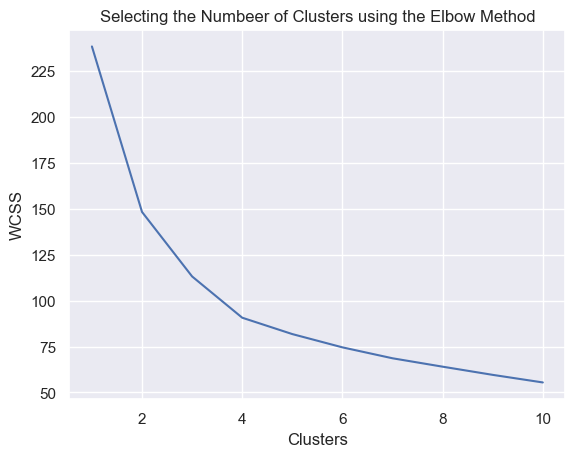

In [29]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [30]:
#from the above elbow diagram the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4)
predicted = kmeans.fit_predict(scaled_df)
print(predicted)

[2 2 2 ... 2 0 1]


c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [31]:
scaled_df['cluster'] = predicted
scaled_df
scaled_df.to_csv('clustered.csv')

In [32]:
property_df = scaled_df[scaled_df['cluster'] == 0]
property_df


,location,bedrooms,bathrooms,price,cluster
7,0.888158,0.4,0.4,0.325843,0
8,0.843750,0.6,0.2,0.269663,0
11,0.847039,0.4,0.4,0.232210,0
14,0.753289,0.4,0.4,0.775281,0
15,0.679276,0.4,0.4,0.400749,0
...,...,...,...,...,...
1698,0.896382,0.6,0.6,0.606742,0
1700,0.636513,0.4,0.4,0.625468,0
1703,0.980263,0.6,0.6,0.625468,0
1706,0.865132,0.6,0.6,0.625468,0


#Training


In [33]:
X = scaled_df[['location','bedrooms','bathrooms','price']].copy()
y = scaled_df.cluster

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

##GridSearchCV


In [35]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma = 'auto'),
                   {
                      'C':[0.001,0.01,0.1, 1, 10, 100, 1000],
                      'kernel':['rbf', 'linear']
                   }, cv=5, return_train_score=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']})

In [36]:
df_1 = pd.DataFrame(clf.cv_results_)
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059453,0.020582,0.052918,0.013743,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.321138,0.321138,0.322449,0.322449,0.322449,0.321925,0.000642,11
1,0.052212,0.006700,0.014139,0.002863,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",0.321138,0.321138,0.322449,0.322449,0.322449,0.321925,0.000642,11
2,0.076417,0.033241,0.061827,0.014436,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.321138,0.321138,0.322449,0.322449,0.322449,0.321925,0.000642,11
3,0.033599,0.008344,0.009813,0.004229,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.321138,0.321138,0.322449,0.322449,0.322449,0.321925,0.000642,11
4,0.057145,0.014531,0.040533,0.009181,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.861789,0.910569,0.897959,0.889796,0.877551,0.887533,0.016774,10
5,0.020423,0.006360,0.009021,0.007443,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.959350,0.943089,0.955102,0.963265,0.951020,0.954365,0.006970,7
6,0.018588,0.010667,0.025835,0.005128,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.959350,0.939024,0.955102,0.946939,0.951020,0.950287,0.006984,9
7,0.009604,0.006346,0.008677,0.006226,1,linear,"{'C': 1, 'kernel': 'linear'}",0.963415,0.943089,0.946939,0.946939,0.955102,0.951097,0.007300,8
8,0.012888,0.006756,0.018395,0.003228,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.979675,0.947154,0.951020,0.963265,0.967347,0.961692,0.011688,6
9,0.015759,0.008868,0.002411,0.004822,10,linear,"{'C': 10, 'kernel': 'linear'}",0.979675,0.955285,0.959184,0.979592,0.975510,0.969849,0.010482,5


In [37]:
clf_2 = GridSearchCV(SVC(gamma = 'auto'),
                   {
                      'C':[0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
                      'kernel':['rbf', 'linear']
                   }, cv=5, return_train_score=False)
clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'kernel': ['rbf', 'linear']})

In [38]:
df_2 = pd.DataFrame(clf_2.cv_results_)
df_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059688,0.012047,0.040667,0.011945,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.321138,0.321138,0.322449,0.322449,0.322449,0.321925,0.000642,16
1,0.031766,0.008661,0.009281,0.004684,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.321138,0.321138,0.322449,0.322449,0.322449,0.321925,0.000642,16
2,0.052868,0.016013,0.043239,0.007501,0.02,rbf,"{'C': 0.02, 'kernel': 'rbf'}",0.321138,0.321138,0.322449,0.322449,0.322449,0.321925,0.000642,16
3,0.038074,0.012349,0.005986,0.004820,0.02,linear,"{'C': 0.02, 'kernel': 'linear'}",0.589431,0.552846,0.567347,0.563265,0.587755,0.572129,0.014261,13
4,0.061936,0.019785,0.047393,0.012103,0.03,rbf,"{'C': 0.03, 'kernel': 'rbf'}",0.353659,0.373984,0.387755,0.395918,0.383673,0.378998,0.014506,15
5,0.024770,0.003007,0.007275,0.004179,0.03,linear,"{'C': 0.03, 'kernel': 'linear'}",0.772358,0.752033,0.767347,0.730612,0.767347,0.757939,0.015275,10
6,0.048761,0.019968,0.043514,0.005924,0.04,rbf,"{'C': 0.04, 'kernel': 'rbf'}",0.548780,0.516260,0.502041,0.546939,0.563265,0.535457,0.022662,14
7,0.030898,0.004645,0.006398,0.005530,0.04,linear,"{'C': 0.04, 'kernel': 'linear'}",0.837398,0.873984,0.869388,0.873469,0.865306,0.863909,0.013621,7
8,0.057510,0.015374,0.047838,0.010585,0.05,rbf,"{'C': 0.05, 'kernel': 'rbf'}",0.634146,0.617886,0.636735,0.612245,0.624490,0.625100,0.009326,12
9,0.037306,0.007507,0.010795,0.005320,0.05,linear,"{'C': 0.05, 'kernel': 'linear'}",0.861789,0.906504,0.902041,0.881633,0.873469,0.885087,0.016946,5


##Model

In [39]:
#from the the above gridsearchCV I have decided to go with C= 0.09, and kernel function 'rbf'
model=SVC(kernel='rbf', C=0.09)
model.fit(X_train, y_train)

SVC(C=0.09)

In [40]:
y_pred = model.predict(X_test)
print(y_pred)

[3 2 0 2 3 3 0 1 3 1 3 1 0 0 3 0 1 2 0 1 0 2 2 3 1 1 1 1 2 1 3 1 1 1 0 1 0
 2 1 2 2 2 2 3 3 2 1 1 0 3 3 1 2 3 3 0 2 1 1 0 1 3 1 1 3 3 1 3 3 0 1 0 2 3
 2 2 0 3 1 1 1 1 1 2 2 2 1 1 2 0 2 1 0 1 0 0 0 2 1 3 2 1 3 1 1 1 2 3 1 2 1
 1 3 0 2 3 2 2 3 1 0 3 3 1 1 0 2 3 1 0 0 3 1 1 3 3 1 0 2 3 1 0 0 1 3 0 3 2
 2 2 1 1 2 1 1 1 0 3 1 1 3 3 1 2 3 2 2 3 3 0 1 1 2 1 1 3 1 1 3 1 2 1 0 1 3
 1 0 1 1 3 3 2 3 0 3 3 1 0 1 1 3 2 2 3 2 3 0 2 3 0 1 3 3 1 2 0 1 1 1 1 2 2
 3 3 2 3 3 1 0 3 1 3 1 3 3 1 2 1 1 1 2 1 0 0 1 1 1 0 1 1 3 0 3 1 1 1 2 1 2
 3 3 1 0 2 3 1 3 2 3 1 2 2 2 3 1 3 1 1 2 1 3 2 1 2 2 0 1 3 0 3 0 2 1 1 2 0
 3 3 2 1 1 3 0 3 1 2 1 0 1 2 2 1 0 0 3 3 3 0 1 1 1 0 3 1 3 2 3 0 3 3 0 3 1
 1 3 1 1 3 1 2 2 3 1 3 3 3 3 3 0 1 3 2 1 0 0 1 2 0 2 3 3 2 2 2 1 3 1 1 1 0
 1 2 3 1 3 1 1 0 1 1 3 2 1 3 2 3 1 0 1 0 1 0 2 1 0 3 2 1 1 2 2 0 2 3 3 2 0
 3 3 1]


In [41]:
f1Score = f1_score(y_test, y_pred,average = None)
accuracyScore = accuracy_score(y_test, y_pred, normalize=False)
print("F1 Score: ", f1Score)
print("Accuracy Score: ", accuracyScore)

F1 Score:  [0.95104895 0.95306859 0.93478261 0.96296296]
Accuracy Score:  390


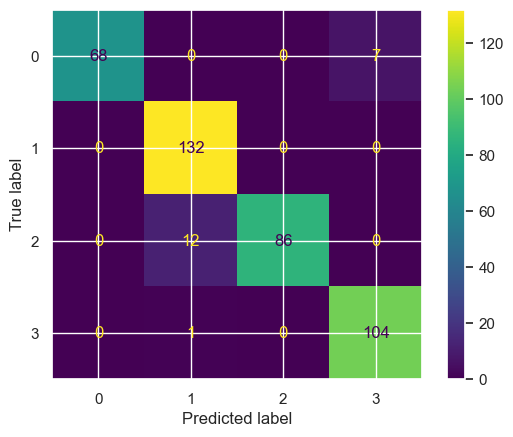

In [42]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

##Model Cross Validation

In [43]:
from sklearn.model_selection import KFold
Kf = KFold(n_splits=5)

In [44]:
def get_score(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [45]:
score = []
for train_index, test_index in Kf.split(X, y):
  X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
  score.append(get_score(model, X_train, X_test, y_train, y_test))

KeyError: '[346, 355, 385, 387, 396, 412, 413, 415, 416, 489, 500, 540, 550, 551, 554, 558, 569, 575, 578, 582, 592, 637, 669, 670, 671, 768, 799, 823, 841, 846, 883, 886, 903, 904, 921, 964, 967, 981, 1001, 1005, 1065, 1108, 1200, 1221, 1234, 1235, 1261, 1313, 1314, 1337, 1339, 1340, 1359, 1360, 1437, 1453, 1491, 1518, 1519, 1527, 1540, 1541, 1603, 1612, 1615] not in index'

In [ ]:
score

[0.9883720930232558,
 0.9883381924198251,
 0.9912536443148688,
 0.892128279883382,
 0.9125364431486881]

In [ ]:
#saved model
from joblib import dump
dump(model, '../SavedModel/model.joblib')

['../SavedModel/model.joblib']

##Cosine similarity calculation

In [ ]:
def recommend(data):
  #encode the location
  data['location'] = label_encoder.transform(data['location'])

  #normalizing the data
  data[['location','bedrooms','bathrooms','price']] = scaler.transform(data)

  #Predict the cluster
  pred = model.predict(data)

  data['cluster'] = pred
  #Retrieve the listings from the same cluster
  if pred == 0:
    property_df = scaled_df[scaled_df['cluster'] == 0]
  elif pred == 1:
    property_df = scaled_df[scaled_df['cluster'] == 1]
  else:
    property_df = scaled_df[scaled_df['cluster'] == 2]

  #Perform cosine similarity
  cosine_similarity_score = cosine_similarity(property_df, data)
  property_df['cos_score'] = cosine_similarity_score
  #Sorting the data by cos_score descending
  sorted_df = property_df.sort_values(['cos_score'], ascending=False)
  #Replacing normalized values with actual values
  sorted_df.loc[:, ['location', 'bedrooms', 'bathrooms','price']] = df[['location', 'bedrooms', 'bathrooms','price']]
  sorted_df
  return sorted_df

In [ ]:
data =  {'location':['Brookside, Brookside, Brookside, Westlands'], 'bedrooms':[3], 'bathrooms': [2], 'price':[56000]}
df_data= pd.DataFrame.from_dict(data)
lst = recommend(df_data)
lst = lst.iloc[:10]
lst

C:\Users\HomePC\AppData\Local\Temp\ipykernel_22308\930840572.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  property_df['cos_score'] = cosine_similarity_score


,location,bedrooms,bathrooms,price,cluster,cos_score
309,"Chinga Dam Apartments, Iregi Road, Parklands, ...",3.0,2.0,58500.0,0,0.999194
336,"Crescent Road, Parklands, Westlands",3.0,2.0,60000.0,0,0.998632
490,"East Church Road, Parklands, Westlands",3.0,2.0,70000.0,0,0.991362
356,"Fourways Junction, Kiambu Road, Kiambu Road",3.0,2.0,60000.0,0,0.991057
511,"Dennis Pritt, Dagoretti North",3.0,2.0,75000.0,0,0.989973
444,"FOURWAYS, Kiambu Road, Kiambu Road",3.0,2.0,70000.0,0,0.989969
442,"Fourways Junction Estate, Kiambu Road, Kiambu ...",3.0,2.0,70000.0,0,0.988721
552,"Argwings Kodhek Road, Kilimani, Dagoretti North",3.0,2.0,75000.0,0,0.988434
445,"Fourways junction, Kiambu Road, Kiambu Road",3.0,2.0,70000.0,0,0.988054
579,"Argwing kodhek road, Lavington, Lavington, Dag...",3.0,2.0,75000.0,0,0.987902
